# Installing the packages

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install livelossplot

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install scikit-image

# Importing libraries for Data Augmentation

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input

# Defining the parameters / arguments for ImageDataGenerator class

In [6]:
# Data Augmentation on training variable Initialize

train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   rotation_range=40,
                                   horizontal_flip=True)

In [7]:
# Data Augmentation on testing variable Initialize

test_datagen = ImageDataGenerator(rescale=1./255)

# For Body Damage

In [8]:
BATCH_SIZE = 32

In [9]:
# Data augmentation on training data 

body_train_generator = train_datagen.flow_from_directory(r'D:\Nalaiya Thiran Project\Juypter\dataset\Car damage\body\training',
                                          target_size = (224,224),
                                          batch_size = BATCH_SIZE,
                                          class_mode = 'categorical')

Found 2221 images belonging to 3 classes.


In [10]:
# Data augmentation on testing data 

body_test_generator = train_datagen.flow_from_directory(r'D:\Nalaiya Thiran Project\Juypter\dataset\Car damage\body\validation',
                                          target_size = (224,224),
                                          batch_size = BATCH_SIZE,
                                          class_mode = 'categorical')

Found 1634 images belonging to 3 classes.


# Model Building

In [11]:
# Importing required lib.

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Input, Dropout
from livelossplot import PlotLossesKeras

In [13]:
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

In [14]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

# Building Model blocks

In [15]:
base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
                   include_top = False, # Leave out the last fully connected layer                 
                   weights = 'imagenet')

In [16]:
# Since we don’t have to train all the layers, we make them non_trainable:

for layer in base_model.layers:
    layer.trainable = False

# Compile

In [17]:
# Flatten the output layer to 1 dimension
x = Flatten()(base_model.output)

# Add a final sigmoid layer with 1 node for classification output
x = Dense(3, activation='softmax')(x)

In [18]:
model = Model(base_model.input, x)

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['acc'])

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# Model Fit

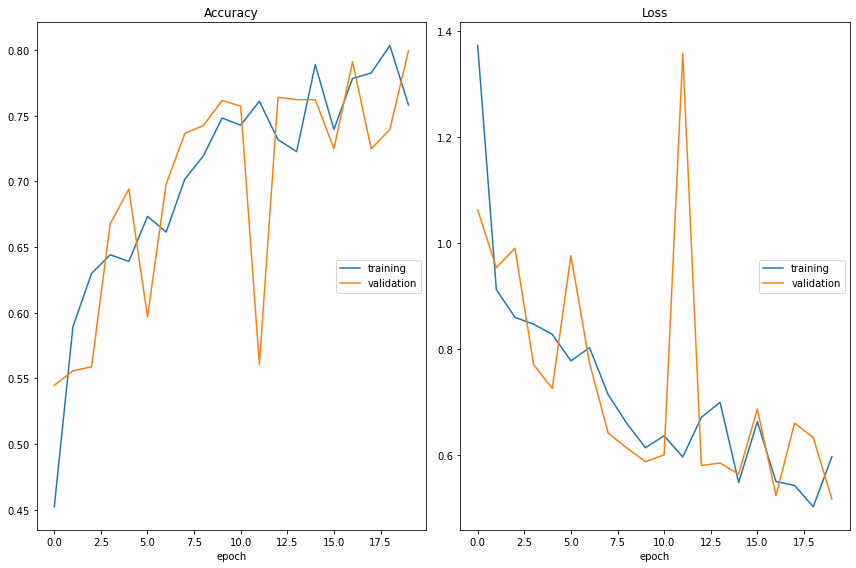

Accuracy
	training         	 (min:    0.452, max:    0.804, cur:    0.758)
	validation       	 (min:    0.545, max:    0.800, cur:    0.800)
Loss
	training         	 (min:    0.503, max:    1.373, cur:    0.597)
	validation       	 (min:    0.517, max:    1.357, cur:    0.517)
69/69 [==============================] - 700s 10s/step - loss: 0.5974 - acc: 0.7583 - val_loss: 0.5174 - val_acc: 0.7996


In [20]:
vggfit = model.fit(body_train_generator,
                    validation_data = body_test_generator,
                    steps_per_epoch = 2221 //BATCH_SIZE,
                    validation_steps = 1634 //BATCH_SIZE,
                    callbacks=[PlotLossesKeras()],
                    epochs = 20)

# Save the Model

In [21]:
#Saving the level model

model.save('body.h5')

# Testing the Model

In [22]:
# Importing the required libraries

from tensorflow.keras.models import load_model
import cv2
from skimage.transform import resize

In [23]:
#Loading the level model

model = load_model('body.h5')

In [24]:
#Creating a function, which is used to predict the level

def detect(frame):
    img = cv2.resize(frame,(224,224)) #Resize the image to model trained image size
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Uploaded image is in the form of BGR, so convert to RGB
    #Sacling need to be done
    if(np.max(img)>1):
        img = img/255.0
    img = np.array([img]) # Doing array format
    prediction = model.predict(img)
    label = ["Front", "Rear", "Side"]
    preds = label[np.argmax(prediction)]
    return preds

# Predictions

In [25]:
#Importing library

import numpy as np

In [26]:
# 1st testing

data = 'D:\\Nalaiya Thiran Project\\Juypter\\dataset\\Car damage\\body\\validation\\01-rear\\da1fa0dc4f16515d76b7fbb8536cd891.JPG'
image = cv2.imread(data)
print(detect(image))

1/1 [==============================] - 1s 545ms/step
Rear


In [27]:
# 2nd testing

data = 'D:\\Nalaiya Thiran Project\\Juypter\\dataset\\Car damage\\body\\validation\\01-rear\\car-stands-broken-avrii-edge-road-blue-car-stands-broken-avrii-edge-road-148077155.JPG'
image = cv2.imread(data)
print(detect(image))

1/1 [==============================] - 0s 258ms/step
Rear


In [28]:
# 3rd testing

data = 'D:\\Nalaiya Thiran Project\\Juypter\\dataset\\Car damage\\body\\validation\\00-front\\DSC_0445.JPG'
image = cv2.imread(data)
print(detect(image))

1/1 [==============================] - 0s 241ms/step
Front


In [29]:
# 4th testing

data = 'D:\\Nalaiya Thiran Project\\Juypter\\dataset\\Car damage\\body\\validation\\02-side\\car-insurance-0344650937.JPG'
image = cv2.imread(data)
print(detect(image))

1/1 [==============================] - 0s 238ms/step
Side


In [30]:
# 4th testing

data = 'D:\\Nalaiya Thiran Project\\Juypter\\dataset\\Car damage\\body\\validation\\02-side\\maxresdefault2.JPG'
image = cv2.imread(data)
print(detect(image))

1/1 [==============================] - 0s 233ms/step
Front


In [31]:
# 5th testing

data = 'D:\\Nalaiya Thiran Project\\Juypter\\dataset\\Car damage\\body\\validation\\02-side\\3389-SilverCRV_BeforeAfter.JPG'
image = cv2.imread(data)
print(detect(image))

1/1 [==============================] - 0s 235ms/step
Side
